# Tugas 3 VDI    
-------------
# (Data Visualitation Methodologi & Define Purpose and parameters)    
**Nama**: Elok Fiola      
**NIM**: 122450051     
**Kelas**: RC     

-----------
Dalam methodologi, langkah pertama yang perlu dlilakukan dalam pengembangan visualisasi adalah mendefinisikan tujuan dan parameter (memperhatikan user, fungsi dan tone). Berdasarkan hal tersebut maka tugas anda adalah:
1. Tentukan data yang akan anda gunakan dalam visualisasi
2. Berdasarkan data yang anda pilih tentukan tujuan, user, fungsi dan tone (jika ada) yang sesuai dengan visualisasi yang akan anda buat
3. Buatlah visualisasi dengan mengunakan library python seperti matplotlib, seaborn atau tools lain  
------------------

## 1. Informasi Data
-------------------------------
Pada visualisasi data ini, digunakan data rata-rata suhu di Kota Pyongyang, Korea Utara. Data yang digunakan saya ambil dari situs resmi Weather Spark melalui tautan https://id.weatherspark.com/y/141759/Cuaca-Rata-rata-pada-bulan-in-Pyongyang-Korea-Utara-Sepanjang-Tahun. Data berukuran 12 x 2 atau 12 baris dan 2 kolom. Atribut data adalah Bulan (Januari - Desember) dan Suhu (°C). Dataset dapat diunduh melalui GitHub https://github.com/elokfiola/VDI-Assignments-2024/blob/517cf4bb5ab88debf609bfecd29eeb7a933e00ec/DataSuhuKorut.csv     

**Summary**   
Di Kota Pyongyang, Korea Utara, biasanya musim hangat berlangsung sekitar 4 bulan dari pertengahan Bulai Mei hingga akhir Bulan September, dengan suhu tertinggi harian rata-rata di atas 23°C. Bulan terpanas biasanya terjadi pada Bulan Agustus, dengan rata-rata suhu terendah 28°C dan tertinggi 21°C.   

Musin sangat dingin berlangsung hampir 3 bulan, dimulai di akhir Bulan November samapi akhir Bulan Februari, dengan suhu rata-rata di bawah 4°C. Bulan terdingin dalam setahun adalah Januari, dengan rata-rata suhu terendah adalah -10°C dan tertinggi -1°C

## 2. Tujuan, user, fungsi, dan tone
-----------

### 2.1 Tujuan
Visualisasi data ini bertujuan sebagai **give information** memberikan informasi kepada suatu kalangan. Diharapkan para target dapat mengetahui informasi mengenai suhu rata-rata di Kota Pyongyang, Korea Utara.

### 2.2 Users
Target/ *users* visualisasi data ini adalah **Large Range of Customer**. Visualisasi data berikut ini dapat dilihat oleh semua kalangan, namun target utama saya adalah kalangan remaja sampai dewasa. Alasannya, selain tujuan visualisasi ini untuk memberikan informasi umum, visualisasi yang dibuat menggunakan desain visual yang menarik dan interaktif, ditambah kombinasi warna-warna yang kontras (biru & merah) dapat mempercepat pemahaman tanpa harus melakukan analisis mendalam(**exploration**). Model ini disesuaikan dengan ketertarikan generasi muda yang cenderung menyukai konten visual yang cepat dipahami.

### 2.3 Fungsi
Visualisasi data ini berfungsi sebagai **explanatory**, yaitu gambaran umum yang mempertegas informasi atau berita. Diharapkan dengan hanya melihat visualisasi ini para target atau *users* dapat mudah memahami dan menyimpulkan suhu di Kota Pyongyang, Korea Utara.

### 2.4 Tone
Dalam visualisasi ini, saya menggunakan tiga warna dasar, yaitu hitam, biru, dan merah.      
1. **Warna hitam** saya gunakan untuk kata dasar, sehingga mata pembaca akan lebih umum mengenali warna pada tulisan dasar.       
2. **Warna biru** digunakan sebagai warna yang merepresentasikan suhu di bawah 0°C, diharapkan target akan cepat memahami bulan dengan suhu rata-rata di bawah 0°C.       
3. **Warna merah** digunakan untuk merepresentasikan suhu di atas 0°C, sehingga para target dapat menyimpulkan bulan dengan suhu rata-rata di atas 0°C. Sehingga dapat mempengaruhi pandangan pembaca mengenai musin ekstrem di Pyongyang.

Penggunaan gradasi warna (*coolwarm colormap*) biru dan merah selain untuk menarik perhatian, bertujuan sebagai parameter rendah dan tingginya suhu. Semakin tinggi/ rendah suhu maka warna akan mendekati warna gelap. Hal ini juga dijelaskan pada parameter warna yang berada si sebelah kanan gambar.

## 3. Membuat visualisasi data
----------

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Mengimport dataset
dfdata = 'DataSuhuKorut.csv'
data = pd.read_csv(dfdata)
print(data)

        Month  Temperature
0     January           -6
1    February           -2
2       March            4
3       April           12
4         May           17
5        June           22
6        July           25
7      August           25
8   September           20
9     October           13
10   November            5
11   December           -3


In [3]:
# Melihat ukuran data
print(data.shape)

(12, 2)


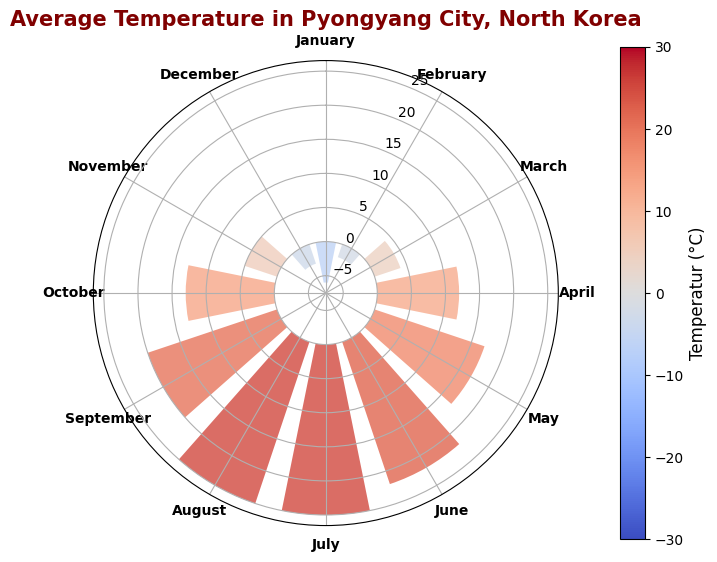

In [4]:
# Menyiapkan data
bulan = data['Month']
suhu = data['Temperature']

# Konversi bulan ke derajat untuk polar plot
angles = np.linspace(0, 2 * np.pi, len(bulan), endpoint=False).tolist()

# Menggabungkan data untuk plotting
suhu = suhu.tolist()
suhu += suhu[:1]  # Looping data untuk membuat lingkaran penuh
angles += angles[:1]

# Membuat warna berdasarkan suhu menggunakan gradasi (cmap)
min_temp = -30  # Rentang suhu minimum
max_temp = 30  # Rentang suhu maksimum
norm = plt.Normalize(min_temp, max_temp)  # Normalisasi suhu ke skala warna
colors = plt.cm.coolwarm(norm(suhu))  # cmap coolwarm untuk warna panas (merah) dan dingin (biru)

# Membuat polar bar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Membuat batang dengan warna berdasarkan suhu
bars = ax.bar(angles[:-1], suhu[:-1], color=colors[:-1], alpha=0.8, width=0.4)

# Menambahkan label bulan dengan gaya visual
ax.set_xticks(angles[:-1])
ax.set_xticklabels(bulan, fontsize=10, fontweight='bold', color='black')

# Menambahkan parameter untuk menggambarkan skala warna
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label('Temperatur (°C)', size=12)

# Membuat judul dan mencetak gambar visualisasi data
plt.title("Average Temperature in Pyongyang City, North Korea", size=15, color='maroon', weight='bold')
plt.show()